In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
stock=pd.read_csv('RIL Stock Price.csv')
stock

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,1-Jan-16,1014.60,1009.80,1018.9,1008.20,1013.6,1015.35,1015.52,1238135,1.257353e+09,30701,529539,42.77
1,RELIANCE,EQ,4-Jan-16,1015.35,1005.00,1013.8,986.70,993.2,995.30,998.91,6896571,6.889070e+09,66235,4974602,72.13
2,RELIANCE,EQ,5-Jan-16,995.30,1000.30,1010.0,997.00,1005.0,1005.15,1003.41,3416459,3.428125e+09,59935,1987804,58.18
3,RELIANCE,EQ,6-Jan-16,1005.15,1007.60,1038.4,1000.40,1029.1,1032.20,1028.15,6116855,6.289073e+09,160947,2912662,47.62
4,RELIANCE,EQ,7-Jan-16,1032.20,1021.05,1028.0,1008.05,1018.9,1013.25,1016.73,4512219,4.587700e+09,105075,2474491,54.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,RELIANCE,EQ,30-Apr-21,2024.05,2008.50,2036.0,1987.55,1995.9,1994.50,2010.20,9150974,1.839532e+10,288687,3902504,42.65
1320,RELIANCE,EQ,3-May-21,1994.50,1966.00,1979.0,1943.10,1956.0,1959.05,1958.46,10909942,2.136664e+10,343806,3800598,34.84
1321,RELIANCE,EQ,4-May-21,1959.05,1950.00,1967.8,1911.00,1918.0,1916.60,1935.83,10083693,1.952033e+10,325798,4435071,43.98
1322,RELIANCE,EQ,5-May-21,1916.60,1923.35,1938.5,1908.05,1921.5,1920.10,1923.26,5719649,1.100036e+10,190990,1762417,30.81


In [3]:
stock.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [4]:
df=pd.DataFrame({'Close':stock['Close Price'],'Trades':stock['No. of Trades']})
df

,Close,Trades
0,1015.35,30701
1,995.30,66235
2,1005.15,59935
3,1032.20,160947
4,1013.25,105075
...,...,...
1319,1994.50,288687
1320,1959.05,343806
1321,1916.60,325798
1322,1920.10,190990


- since we don't have any labeled column in our dataset
- let's create a two types of labeles, 
    - High Trading Days, >150000
    - Low Trading Day, <=150000

In [9]:
df['TradingFrequency'] = np.where((df['Trades']>150000), 'High', 'Low')
df

,Close,Trades,TradingFrequency
0,1015.35,30701,Low
1,995.30,66235,Low
2,1005.15,59935,Low
3,1032.20,160947,High
4,1013.25,105075,Low
...,...,...,...
1319,1994.50,288687,High
1320,1959.05,343806,High
1321,1916.60,325798,High
1322,1920.10,190990,High


- now we have our label column created

<AxesSubplot:>

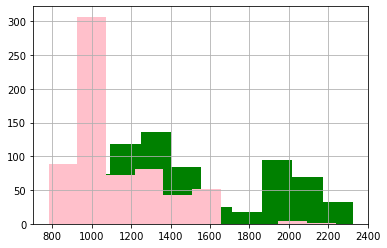

In [10]:
high=df.loc[df['TradingFrequency']=='High']
highplt=high['Close']

low=df.loc[df['TradingFrequency']=='Low']
lowplt=low['Close']

highplt.hist(color='green')
lowplt.hist(color='pink')

# AB testing

### H0: The mean of High and Low are the same, High is greater than Low by chance
### Ha: The mean of High is greater than Low

In [13]:
means = df.groupby('TradingFrequency').mean()
means[['Close']]

,Close
TradingFrequency,
High,1501.881065
Low,1114.159105


## One Permutation

In [14]:
difference = means['Close'][0]-means['Close'][1]
observed_difference=difference
observed_difference

387.72196015048576

In [18]:
randSample=df.sample(1324,replace=False)
randSample

,Close,Trades,TradingFrequency
382,1519.90,91217,Low
903,1266.80,238915,High
720,1168.50,185139,High
348,1359.35,71958,Low
1173,2201.70,329859,High
...,...,...,...
978,1562.70,188391,High
760,1246.00,183744,High
845,1330.15,203751,High
30,946.75,129662,Low


In [26]:
original_shuffled=df.copy()
original_shuffled['shuffled']=randSample['Close'].values
original_shuffled

,Close,Trades,TradingFrequency,shuffled
0,1015.35,30701,Low,1519.90
1,995.30,66235,Low,1266.80
2,1005.15,59935,Low,1168.50
3,1032.20,160947,High,1359.35
4,1013.25,105075,Low,2201.70
...,...,...,...,...
1319,1994.50,288687,High,1562.70
1320,1959.05,343806,High,1246.00
1321,1916.60,325798,High,1330.15
1322,1920.10,190990,High,946.75


In [27]:
original_shuffled.drop(['Trades'], axis=1,inplace=True)
original_shuffled

,Close,TradingFrequency,shuffled
0,1015.35,Low,1519.90
1,995.30,Low,1266.80
2,1005.15,Low,1168.50
3,1032.20,High,1359.35
4,1013.25,Low,2201.70
...,...,...,...
1319,1994.50,High,1562.70
1320,1959.05,High,1246.00
1321,1916.60,High,1330.15
1322,1920.10,High,946.75


In [28]:
group_means= original_shuffled.groupby('TradingFrequency').mean()
group_means

,Close,shuffled
TradingFrequency,,
High,1501.881065,1309.776405
Low,1114.159105,1314.564583


In [29]:
difference = group_means['shuffled'][0]- group_means['shuffled'][1]
difference

-4.788178007889655

### Multiple Permutations

In [32]:
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    original = df[['Close', 'TradingFrequency']]
    shuffled = original.sample(1324,replace = False)
    shuffled_total = shuffled['Close']
    original_shuffled = original.assign(shuffled_total=shuffled_total.values )
    group_means= original_shuffled.groupby('TradingFrequency').mean()
    difference = group_means['shuffled_total'][0]- group_means['shuffled_total'][1]
    differences[i] = difference

In [34]:
differences_df=pd.DataFrame(differences, columns=['difference'])
differences_df

,difference
0,8.464728
1,-10.891512
2,-24.733352
3,-6.977224
4,-1.174931
...,...
4995,-14.170924
4996,-3.345085
4997,-28.042083
4998,-6.832295


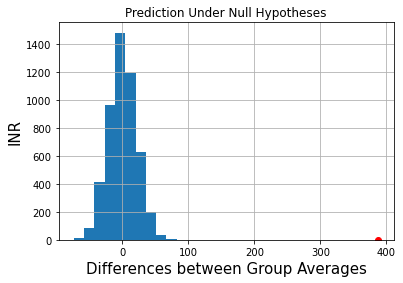

In [35]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('INR',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

### The Observed diffence doesn't lie within the sample difference histogram.
### Hence we can reject the null hypothesis
### Therefore they are not by chance, and thus we can prove that the mean of High is greater than Low